# 12. Eclipse Analysis

This notebook analyzes the relationship between solar and lunar eclipses and earthquake occurrence.

## Research Questions
- **RQ-F1:** Is there a statistically significant increase in earthquake counts on eclipse days?
- **RQ-F2:** Does earthquake probability differ by eclipse type (partial, annular, total, hybrid)?

## Data Sources
- Solar eclipses: 79 events (1990-2025)
- Lunar eclipses: 102 events (1990-2025)
- Earthquake data: earthquakes_processed.csv

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Settings
plt.style.use('seaborn-v0_8-whitegrid')
FIGURE_DPI = 150
pd.set_option('display.max_columns', None)

# Output paths
import os
FIGURES_PATH = '../reports/figures/12_eclipse_analysis'
TABLES_PATH = '../reports/tables'
os.makedirs(FIGURES_PATH, exist_ok=True)
os.makedirs(TABLES_PATH, exist_ok=True)

print('Libraries loaded successfully')

Libraries loaded successfully


## 1. Data Loading

In [2]:
# Load earthquake data
df_eq = pd.read_csv('../data/processed/earthquakes_processed.csv', low_memory=False)
df_eq['date'] = pd.to_datetime(df_eq['date'], format='mixed')
df_eq['date_only'] = df_eq['date'].dt.date

print(f'Earthquake data: {len(df_eq):,} records')
print(f'Date range: {df_eq["date"].min()} to {df_eq["date"].max()}')

Earthquake data: 524,952 records
Date range: 1990-01-03 13:30:14 to 2025-11-20 16:51:56


In [3]:
# Load solar eclipse data
df_solar = pd.read_csv('../data/raw/lunar/solar_eclipses_1990_2025.csv')
df_solar['date'] = pd.to_datetime(df_solar['date'])
df_solar['eclipse_category'] = 'Solar'

print(f'Solar eclipses: {len(df_solar)} events')
print(f'\nType distribution:')
print(df_solar['eclipse_type'].value_counts())

Solar eclipses: 79 events

Type distribution:
eclipse_type
Partial    28
Annular    25
Total      23
Hybrid      3
Name: count, dtype: int64


In [4]:
# Load lunar eclipse data
df_lunar = pd.read_csv('../data/raw/lunar/lunar_eclipses_1990_2025.csv')
df_lunar['date'] = pd.to_datetime(df_lunar['date'])
df_lunar['eclipse_category'] = 'Lunar'

print(f'Lunar eclipses: {len(df_lunar)} events')
print(f'\nType distribution:')
print(df_lunar['eclipse_type'].value_counts())

Lunar eclipses: 82 events

Type distribution:
eclipse_type
T    32
N    31
P    19
Name: count, dtype: int64


In [5]:
# Combine eclipse data
df_eclipses = pd.concat([
    df_solar[['date', 'eclipse_type', 'eclipse_category']],
    df_lunar[['date', 'eclipse_type', 'eclipse_category']]
], ignore_index=True)

df_eclipses['date_only'] = df_eclipses['date'].dt.date
print(f'Total eclipses: {len(df_eclipses)}')
print(f'\nCategory distribution:')
print(df_eclipses['eclipse_category'].value_counts())

Total eclipses: 161

Category distribution:
eclipse_category
Lunar    82
Solar    79
Name: count, dtype: int64


## 2. Solar Eclipse EDA

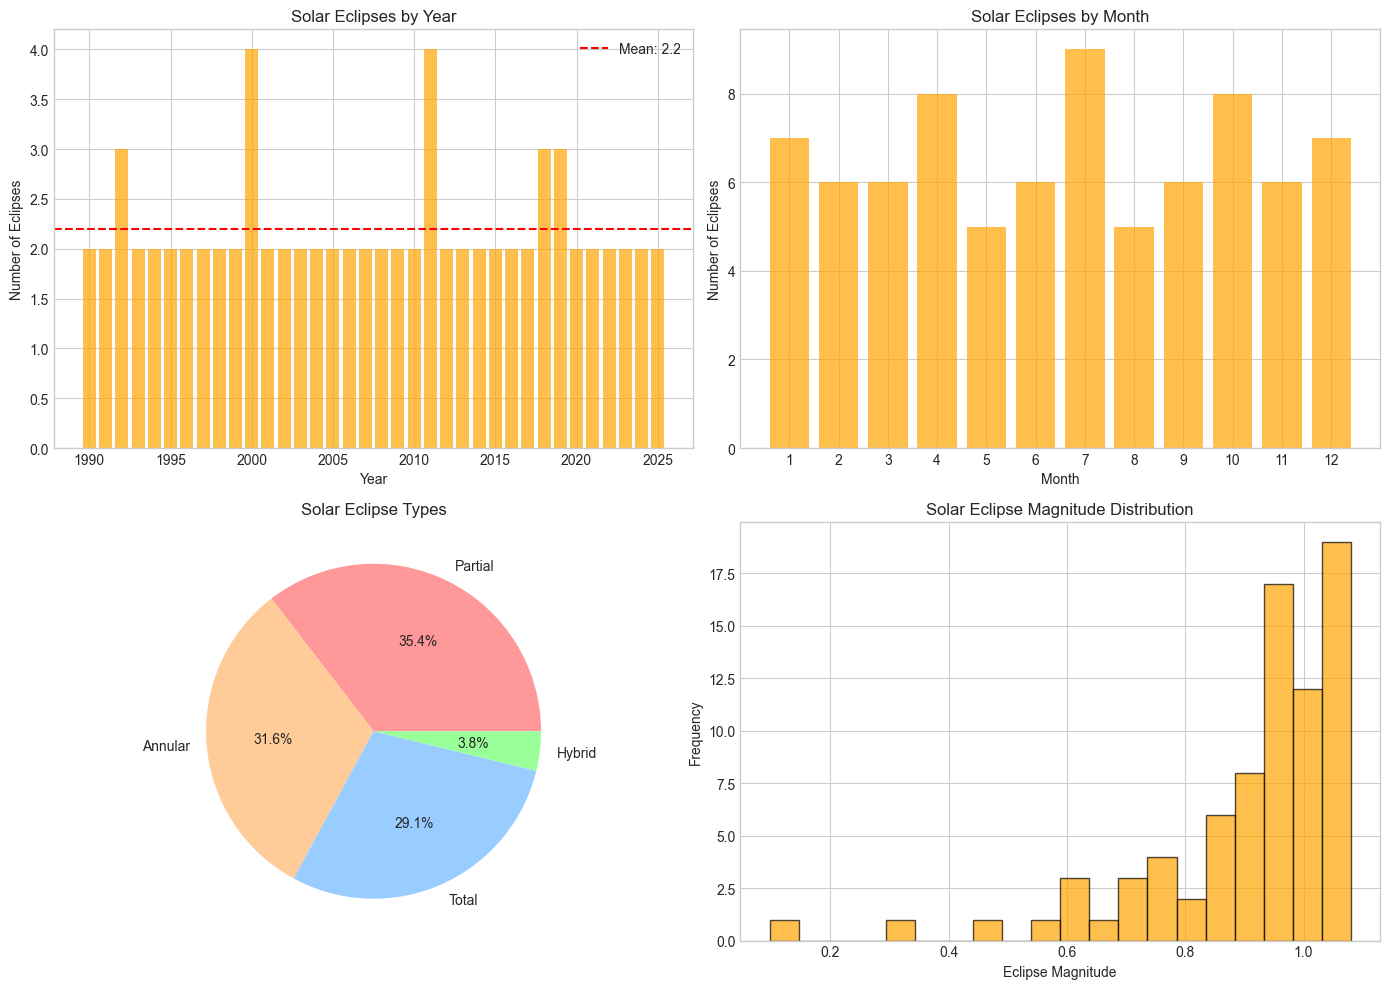

Solar eclipse EDA complete


In [6]:
# Solar eclipse temporal distribution
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Yearly distribution
solar_yearly = df_solar.groupby('year').size()
axes[0, 0].bar(solar_yearly.index, solar_yearly.values, color='orange', alpha=0.7)
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Number of Eclipses')
axes[0, 0].set_title('Solar Eclipses by Year')
axes[0, 0].axhline(y=solar_yearly.mean(), color='red', linestyle='--', label=f'Mean: {solar_yearly.mean():.1f}')
axes[0, 0].legend()

# Monthly distribution
solar_monthly = df_solar.groupby('month').size()
axes[0, 1].bar(range(1, 13), [solar_monthly.get(m, 0) for m in range(1, 13)], color='orange', alpha=0.7)
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Number of Eclipses')
axes[0, 1].set_title('Solar Eclipses by Month')
axes[0, 1].set_xticks(range(1, 13))

# Type distribution
type_counts = df_solar['eclipse_type'].value_counts()
colors = ['#ff9999', '#ffcc99', '#99ccff', '#99ff99']
axes[1, 0].pie(type_counts.values, labels=type_counts.index, autopct='%1.1f%%', colors=colors[:len(type_counts)])
axes[1, 0].set_title('Solar Eclipse Types')

# Eclipse magnitude distribution
df_solar['eclipse_magnitude'] = pd.to_numeric(df_solar['eclipse_magnitude'], errors='coerce')
axes[1, 1].hist(df_solar['eclipse_magnitude'].dropna(), bins=20, color='orange', alpha=0.7, edgecolor='black')
axes[1, 1].set_xlabel('Eclipse Magnitude')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Solar Eclipse Magnitude Distribution')

plt.tight_layout()
plt.savefig(f'{FIGURES_PATH}/solar_eclipse_eda.png', dpi=FIGURE_DPI, bbox_inches='tight')
plt.show()

print('Solar eclipse EDA complete')

## 3. Lunar Eclipse EDA

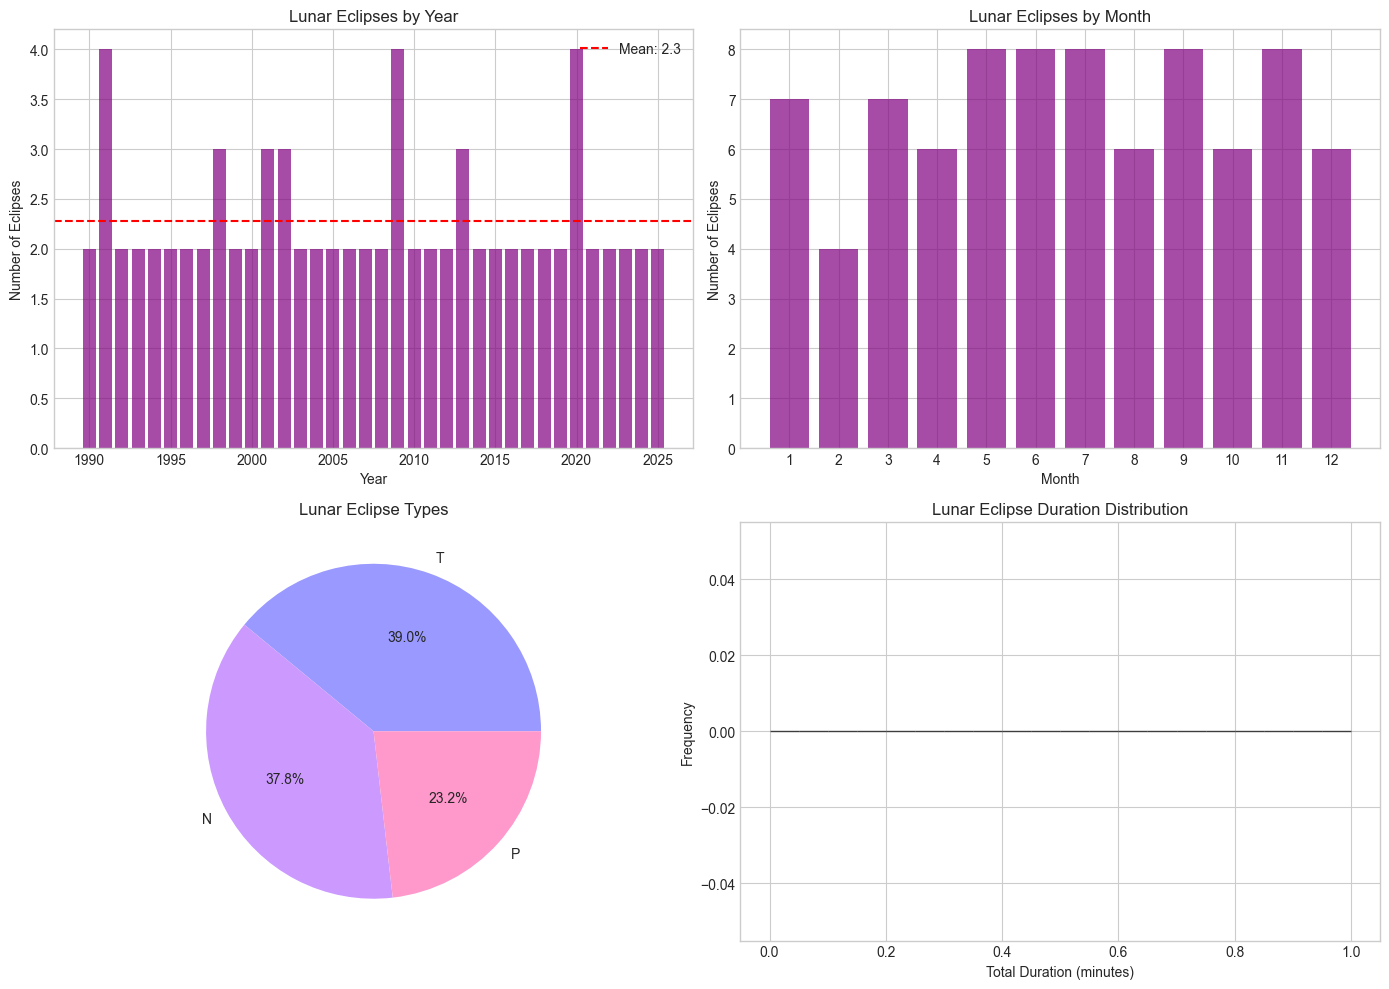

Lunar eclipse EDA complete


In [7]:
# Lunar eclipse temporal distribution
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Yearly distribution
lunar_yearly = df_lunar.groupby('year').size()
axes[0, 0].bar(lunar_yearly.index, lunar_yearly.values, color='purple', alpha=0.7)
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Number of Eclipses')
axes[0, 0].set_title('Lunar Eclipses by Year')
axes[0, 0].axhline(y=lunar_yearly.mean(), color='red', linestyle='--', label=f'Mean: {lunar_yearly.mean():.1f}')
axes[0, 0].legend()

# Monthly distribution
lunar_monthly = df_lunar.groupby('month').size()
axes[0, 1].bar(range(1, 13), [lunar_monthly.get(m, 0) for m in range(1, 13)], color='purple', alpha=0.7)
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Number of Eclipses')
axes[0, 1].set_title('Lunar Eclipses by Month')
axes[0, 1].set_xticks(range(1, 13))

# Type distribution
lunar_type_counts = df_lunar['eclipse_type'].value_counts()
colors_lunar = ['#9999ff', '#cc99ff', '#ff99cc']
axes[1, 0].pie(lunar_type_counts.values, labels=lunar_type_counts.index, autopct='%1.1f%%', colors=colors_lunar[:len(lunar_type_counts)])
axes[1, 0].set_title('Lunar Eclipse Types')

# Duration distribution (if available)
if 'total_duration_min' in df_lunar.columns:
    df_lunar['total_duration_min'] = pd.to_numeric(df_lunar['total_duration_min'], errors='coerce')
    axes[1, 1].hist(df_lunar['total_duration_min'].dropna(), bins=20, color='purple', alpha=0.7, edgecolor='black')
    axes[1, 1].set_xlabel('Total Duration (minutes)')
    axes[1, 1].set_ylabel('Frequency')
    axes[1, 1].set_title('Lunar Eclipse Duration Distribution')
else:
    axes[1, 1].text(0.5, 0.5, 'Duration data not available', ha='center', va='center', fontsize=12)
    axes[1, 1].set_title('Lunar Eclipse Duration')

plt.tight_layout()
plt.savefig(f'{FIGURES_PATH}/lunar_eclipse_eda.png', dpi=FIGURE_DPI, bbox_inches='tight')
plt.show()

print('Lunar eclipse EDA complete')

## 4. Eclipse-Earthquake Correlation Analysis

In [8]:
# Calculate daily earthquake counts
daily_counts = df_eq.groupby('date_only').agg({
    'magnitude': ['count', 'mean', 'max']
}).reset_index()
daily_counts.columns = ['date_only', 'eq_count', 'eq_mean_mag', 'eq_max_mag']

# Mark eclipse days
eclipse_dates = set(df_eclipses['date_only'].tolist())
daily_counts['is_eclipse_day'] = daily_counts['date_only'].isin(eclipse_dates)

# Separate solar and lunar eclipse dates
solar_dates = set(df_solar['date'].dt.date.tolist())
lunar_dates = set(df_lunar['date'].dt.date.tolist())
daily_counts['is_solar_eclipse'] = daily_counts['date_only'].isin(solar_dates)
daily_counts['is_lunar_eclipse'] = daily_counts['date_only'].isin(lunar_dates)

print(f'Total days in dataset: {len(daily_counts):,}')
print(f'Eclipse days: {daily_counts["is_eclipse_day"].sum()}')
print(f'  - Solar eclipse days: {daily_counts["is_solar_eclipse"].sum()}')
print(f'  - Lunar eclipse days: {daily_counts["is_lunar_eclipse"].sum()}')

Total days in dataset: 10,496
Eclipse days: 126
  - Solar eclipse days: 59
  - Lunar eclipse days: 67


In [9]:
# Compare earthquake counts on eclipse vs non-eclipse days
eclipse_day_stats = daily_counts[daily_counts['is_eclipse_day']]['eq_count']
non_eclipse_day_stats = daily_counts[~daily_counts['is_eclipse_day']]['eq_count']

print('='*60)
print('EARTHQUAKE COUNTS: ECLIPSE vs NON-ECLIPSE DAYS')
print('='*60)
print(f'\nEclipse Days (n={len(eclipse_day_stats)}):')
print(f'  Mean: {eclipse_day_stats.mean():.2f}')
print(f'  Median: {eclipse_day_stats.median():.2f}')
print(f'  Std: {eclipse_day_stats.std():.2f}')

print(f'\nNon-Eclipse Days (n={len(non_eclipse_day_stats)}):')
print(f'  Mean: {non_eclipse_day_stats.mean():.2f}')
print(f'  Median: {non_eclipse_day_stats.median():.2f}')
print(f'  Std: {non_eclipse_day_stats.std():.2f}')

# Statistical test
t_stat, t_pvalue = stats.ttest_ind(eclipse_day_stats, non_eclipse_day_stats)
u_stat, u_pvalue = stats.mannwhitneyu(eclipse_day_stats, non_eclipse_day_stats, alternative='two-sided')

print(f'\nStatistical Tests:')
print(f'  T-test: t={t_stat:.3f}, p={t_pvalue:.4f}')
print(f'  Mann-Whitney U: U={u_stat:.1f}, p={u_pvalue:.4f}')

if t_pvalue < 0.05:
    print(f'\n  → Significant difference in earthquake counts on eclipse days!')
else:
    print(f'\n  → No significant difference in earthquake counts on eclipse days')

EARTHQUAKE COUNTS: ECLIPSE vs NON-ECLIPSE DAYS

Eclipse Days (n=126):
  Mean: 48.53
  Median: 41.00
  Std: 54.22

Non-Eclipse Days (n=10370):
  Mean: 50.03
  Median: 41.00
  Std: 62.54

Statistical Tests:
  T-test: t=-0.268, p=0.7886
  Mann-Whitney U: U=635037.5, p=0.5887

  → No significant difference in earthquake counts on eclipse days


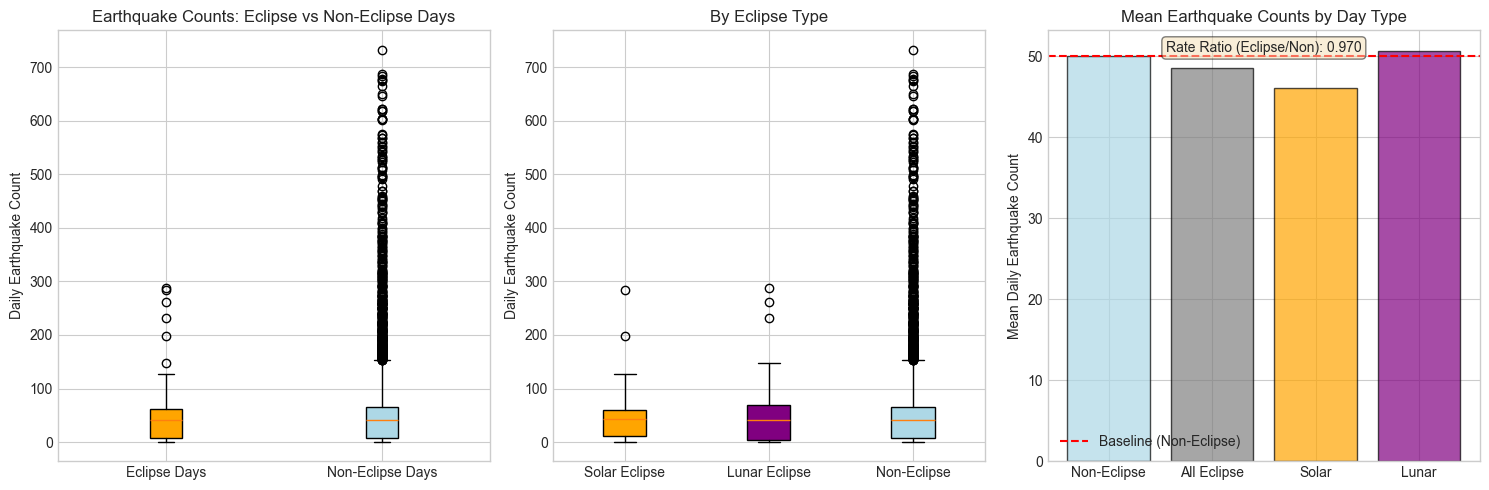

In [10]:
# Visualization: Eclipse vs Non-Eclipse Days
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Box plot comparison
data_box = [eclipse_day_stats, non_eclipse_day_stats]
bp = axes[0].boxplot(data_box, labels=['Eclipse Days', 'Non-Eclipse Days'], patch_artist=True)
bp['boxes'][0].set_facecolor('orange')
bp['boxes'][1].set_facecolor('lightblue')
axes[0].set_ylabel('Daily Earthquake Count')
axes[0].set_title('Earthquake Counts: Eclipse vs Non-Eclipse Days')

# Solar vs Lunar comparison
solar_day_stats = daily_counts[daily_counts['is_solar_eclipse']]['eq_count']
lunar_day_stats = daily_counts[daily_counts['is_lunar_eclipse']]['eq_count']

data_eclipse_type = [solar_day_stats, lunar_day_stats, non_eclipse_day_stats]
bp2 = axes[1].boxplot(data_eclipse_type, labels=['Solar Eclipse', 'Lunar Eclipse', 'Non-Eclipse'], patch_artist=True)
bp2['boxes'][0].set_facecolor('orange')
bp2['boxes'][1].set_facecolor('purple')
bp2['boxes'][2].set_facecolor('lightblue')
axes[1].set_ylabel('Daily Earthquake Count')
axes[1].set_title('By Eclipse Type')

# Rate comparison
eclipse_mean = eclipse_day_stats.mean()
non_eclipse_mean = non_eclipse_day_stats.mean()
solar_mean = solar_day_stats.mean() if len(solar_day_stats) > 0 else 0
lunar_mean = lunar_day_stats.mean() if len(lunar_day_stats) > 0 else 0

categories = ['Non-Eclipse', 'All Eclipse', 'Solar', 'Lunar']
means = [non_eclipse_mean, eclipse_mean, solar_mean, lunar_mean]
colors = ['lightblue', 'gray', 'orange', 'purple']
bars = axes[2].bar(categories, means, color=colors, alpha=0.7, edgecolor='black')
axes[2].axhline(y=non_eclipse_mean, color='red', linestyle='--', label='Baseline (Non-Eclipse)')
axes[2].set_ylabel('Mean Daily Earthquake Count')
axes[2].set_title('Mean Earthquake Counts by Day Type')
axes[2].legend()

# Add rate ratio annotation
rate_ratio = eclipse_mean / non_eclipse_mean
axes[2].text(0.5, 0.95, f'Rate Ratio (Eclipse/Non): {rate_ratio:.3f}', 
             transform=axes[2].transAxes, ha='center', fontsize=10, 
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig(f'{FIGURES_PATH}/eclipse_earthquake_comparison.png', dpi=FIGURE_DPI, bbox_inches='tight')
plt.show()

## 5. RQ-F1: Exact Binomial Test for Eclipse Day Effects

In [11]:
# RQ-F1: Is there a statistically significant increase in earthquakes on eclipse days?
print('='*60)
print('RQ-F1: EARTHQUAKE OCCURRENCE ON ECLIPSE DAYS')
print('='*60)

# Define major earthquake threshold
MAJOR_THRESHOLD = 4.0

# Count major earthquakes on eclipse vs non-eclipse days
df_eq['date_only'] = pd.to_datetime(df_eq['date']).dt.date
df_eq['is_eclipse_day'] = df_eq['date_only'].isin(eclipse_dates)
df_eq['is_major'] = df_eq['magnitude'] >= MAJOR_THRESHOLD

# Counts
n_eclipse_days = len(df_eclipses)
n_total_days = len(daily_counts)
n_non_eclipse_days = n_total_days - n_eclipse_days

major_on_eclipse = df_eq[df_eq['is_eclipse_day'] & df_eq['is_major']].shape[0]
major_on_non_eclipse = df_eq[~df_eq['is_eclipse_day'] & df_eq['is_major']].shape[0]
total_major = major_on_eclipse + major_on_non_eclipse

# Expected under null hypothesis (uniform distribution)
expected_major_eclipse = total_major * (n_eclipse_days / n_total_days)

print(f'\nTotal days: {n_total_days}')
print(f'Eclipse days: {n_eclipse_days} ({100*n_eclipse_days/n_total_days:.2f}%)')
print(f'\nMajor earthquakes (M≥{MAJOR_THRESHOLD}):')
print(f'  Total: {total_major}')
print(f'  On eclipse days: {major_on_eclipse}')
print(f'  Expected on eclipse days (null): {expected_major_eclipse:.1f}')

# Exact binomial test
p_eclipse = n_eclipse_days / n_total_days
binom_result = stats.binomtest(major_on_eclipse, total_major, p_eclipse, alternative='two-sided')

print(f'\nExact Binomial Test:')
print(f'  Observed: {major_on_eclipse}')
print(f'  Expected: {expected_major_eclipse:.1f}')
print(f'  p-value: {binom_result.pvalue:.4f}')

if binom_result.pvalue < 0.05:
    if major_on_eclipse > expected_major_eclipse:
        print(f'\n  → SIGNIFICANT: More major earthquakes on eclipse days than expected!')
    else:
        print(f'\n  → SIGNIFICANT: Fewer major earthquakes on eclipse days than expected!')
else:
    print(f'\n  → Not significant: No evidence of eclipse day effect on earthquake occurrence')

RQ-F1: EARTHQUAKE OCCURRENCE ON ECLIPSE DAYS

Total days: 10496
Eclipse days: 161 (1.53%)

Major earthquakes (M≥4.0):
  Total: 4103
  On eclipse days: 45
  Expected on eclipse days (null): 62.9

Exact Binomial Test:
  Observed: 45
  Expected: 62.9
  p-value: 0.0219

  → SIGNIFICANT: Fewer major earthquakes on eclipse days than expected!


## 6. RQ-F2: Eclipse Type Analysis

In [12]:
# RQ-F2: Does earthquake probability differ by eclipse type?
print('='*60)
print('RQ-F2: EARTHQUAKE OCCURRENCE BY ECLIPSE TYPE')
print('='*60)

# Merge eclipse type information with daily counts
eclipse_type_map = {}
for _, row in df_eclipses.iterrows():
    eclipse_type_map[row['date_only']] = row['eclipse_type']

daily_counts['eclipse_type'] = daily_counts['date_only'].map(eclipse_type_map)
daily_counts['eclipse_type'] = daily_counts['eclipse_type'].fillna('Non-Eclipse')

# Statistics by eclipse type
print('\nEarthquake counts by eclipse type:')
type_stats = daily_counts.groupby('eclipse_type')['eq_count'].agg(['count', 'mean', 'std', 'median'])
type_stats.columns = ['n_days', 'mean', 'std', 'median']
print(type_stats.round(2))

# ANOVA test (excluding Non-Eclipse for eclipse type comparison)
eclipse_only = daily_counts[daily_counts['eclipse_type'] != 'Non-Eclipse']
groups = [group['eq_count'].values for name, group in eclipse_only.groupby('eclipse_type')]

if len(groups) >= 2:
    f_stat, anova_pvalue = stats.f_oneway(*groups)
    print(f'\nANOVA (eclipse types only):')
    print(f'  F-statistic: {f_stat:.3f}')
    print(f'  p-value: {anova_pvalue:.4f}')
    
    if anova_pvalue < 0.05:
        print(f'\n  → SIGNIFICANT: Earthquake counts differ by eclipse type!')
    else:
        print(f'\n  → Not significant: No difference between eclipse types')

# Kruskal-Wallis (non-parametric)
h_stat, kw_pvalue = stats.kruskal(*groups)
print(f'\nKruskal-Wallis Test:')
print(f'  H-statistic: {h_stat:.3f}')
print(f'  p-value: {kw_pvalue:.4f}')

RQ-F2: EARTHQUAKE OCCURRENCE BY ECLIPSE TYPE

Earthquake counts by eclipse type:
              n_days    mean     std  median
eclipse_type                                
Annular           18   46.50   37.19    47.5
Hybrid             3  122.33  142.13    66.0
N                 24   51.21   59.64    40.0
Non-Eclipse    10370   50.03   62.54    41.0
P                 17   57.18   61.67    41.0
Partial           20   44.35   45.47    39.0
T                 26   45.88   57.55    39.5
Total             18   35.00   31.72    30.0

ANOVA (eclipse types only):
  F-statistic: 1.244
  p-value: 0.2889

  → Not significant: No difference between eclipse types

Kruskal-Wallis Test:
  H-statistic: 2.411
  p-value: 0.8783


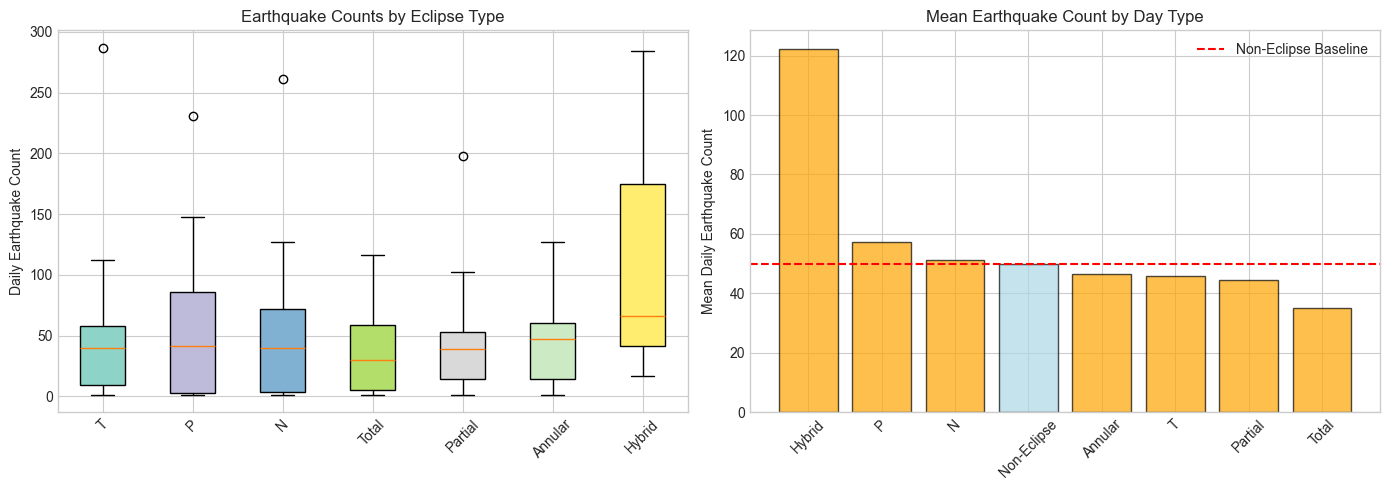

In [13]:
# Visualization: Earthquake counts by eclipse type
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Box plot by eclipse type
eclipse_types = daily_counts[daily_counts['eclipse_type'] != 'Non-Eclipse']['eclipse_type'].unique()
data_by_type = [daily_counts[daily_counts['eclipse_type'] == t]['eq_count'] for t in eclipse_types]

bp = axes[0].boxplot(data_by_type, labels=eclipse_types, patch_artist=True)
colors = plt.cm.Set3(np.linspace(0, 1, len(eclipse_types)))
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
axes[0].set_ylabel('Daily Earthquake Count')
axes[0].set_title('Earthquake Counts by Eclipse Type')
axes[0].tick_params(axis='x', rotation=45)

# Bar plot of means
type_means = daily_counts.groupby('eclipse_type')['eq_count'].mean().sort_values(ascending=False)
colors_bar = ['orange' if t in ['Total', 'Annular', 'Partial', 'Hybrid', 'T', 'P', 'N'] else 'lightblue' for t in type_means.index]
axes[1].bar(type_means.index, type_means.values, color=colors_bar, alpha=0.7, edgecolor='black')
axes[1].set_ylabel('Mean Daily Earthquake Count')
axes[1].set_title('Mean Earthquake Count by Day Type')
axes[1].tick_params(axis='x', rotation=45)
axes[1].axhline(y=type_means.get('Non-Eclipse', 0), color='red', linestyle='--', label='Non-Eclipse Baseline')
axes[1].legend()

plt.tight_layout()
plt.savefig(f'{FIGURES_PATH}/eclipse_type_comparison.png', dpi=FIGURE_DPI, bbox_inches='tight')
plt.show()

## 7. Extended Analysis: Window Around Eclipse Days

In [14]:
# Analyze earthquake activity in window around eclipse days
WINDOW_DAYS = 7  # Days before and after eclipse

def get_window_dates(eclipse_date, window=WINDOW_DAYS):
    """Get dates within window of eclipse"""
    dates = []
    for i in range(-window, window+1):
        dates.append(eclipse_date + timedelta(days=i))
    return dates

# Create window flags
window_dates = set()
for eclipse_date in df_eclipses['date'].dt.date:
    window_dates.update([d.date() if isinstance(d, datetime) else d for d in get_window_dates(eclipse_date)])

daily_counts['in_eclipse_window'] = daily_counts['date_only'].isin(window_dates)

# Compare
window_stats = daily_counts[daily_counts['in_eclipse_window']]['eq_count']
non_window_stats = daily_counts[~daily_counts['in_eclipse_window']]['eq_count']

print(f'Window analysis (±{WINDOW_DAYS} days around eclipses):')
print(f'\nWithin window (n={len(window_stats)} days):')
print(f'  Mean: {window_stats.mean():.2f}')
print(f'  Median: {window_stats.median():.2f}')

print(f'\nOutside window (n={len(non_window_stats)} days):')
print(f'  Mean: {non_window_stats.mean():.2f}')
print(f'  Median: {non_window_stats.median():.2f}')

# Test
t_stat, t_pval = stats.ttest_ind(window_stats, non_window_stats)
print(f'\nT-test: t={t_stat:.3f}, p={t_pval:.4f}')

Window analysis (±7 days around eclipses):

Within window (n=1893 days):
  Mean: 48.65
  Median: 40.00

Outside window (n=8603 days):
  Mean: 50.31
  Median: 41.00

T-test: t=-1.048, p=0.2945


## 8. Summary and Results Export

In [15]:
# Create summary table
summary_results = {
    'Analysis': [
        'Eclipse Days vs Non-Eclipse (Mean EQ Count)',
        'Eclipse Days vs Non-Eclipse (T-test p-value)',
        'Solar Eclipse Mean EQ Count',
        'Lunar Eclipse Mean EQ Count',
        'Non-Eclipse Mean EQ Count',
        'RQ-F1: Binomial Test p-value',
        'RQ-F2: ANOVA p-value',
        'Rate Ratio (Eclipse/Non-Eclipse)'
    ],
    'Value': [
        f'{eclipse_day_stats.mean():.2f} vs {non_eclipse_day_stats.mean():.2f}',
        f'{t_pvalue:.4f}',
        f'{solar_day_stats.mean():.2f}',
        f'{lunar_day_stats.mean():.2f}',
        f'{non_eclipse_day_stats.mean():.2f}',
        f'{binom_result.pvalue:.4f}',
        f'{anova_pvalue:.4f}' if 'anova_pvalue' in dir() else 'N/A',
        f'{rate_ratio:.4f}'
    ],
    'Significant': [
        'Yes' if t_pvalue < 0.05 else 'No',
        '-',
        '-',
        '-',
        '-',
        'Yes' if binom_result.pvalue < 0.05 else 'No',
        'Yes' if 'anova_pvalue' in dir() and anova_pvalue < 0.05 else 'No',
        '-'
    ]
}

summary_df = pd.DataFrame(summary_results)
print('='*60)
print('ECLIPSE ANALYSIS SUMMARY')
print('='*60)
print(summary_df.to_string(index=False))

# Save results
summary_df.to_csv(f'{TABLES_PATH}/eclipse_analysis_summary.csv', index=False)
type_stats.to_csv(f'{TABLES_PATH}/eclipse_type_statistics.csv')

print(f'\nResults saved to:')
print(f'  - {TABLES_PATH}/eclipse_analysis_summary.csv')
print(f'  - {TABLES_PATH}/eclipse_type_statistics.csv')

ECLIPSE ANALYSIS SUMMARY
                                    Analysis          Value Significant
 Eclipse Days vs Non-Eclipse (Mean EQ Count) 48.53 vs 50.03          No
Eclipse Days vs Non-Eclipse (T-test p-value)         0.7886           -
                 Solar Eclipse Mean EQ Count          46.12           -
                 Lunar Eclipse Mean EQ Count          50.66           -
                   Non-Eclipse Mean EQ Count          50.03           -
                RQ-F1: Binomial Test p-value         0.0219         Yes
                        RQ-F2: ANOVA p-value         0.2889          No
            Rate Ratio (Eclipse/Non-Eclipse)         0.9700           -

Results saved to:
  - ../reports/tables/eclipse_analysis_summary.csv
  - ../reports/tables/eclipse_type_statistics.csv


## 9. Conclusions

### Key Findings

1. **RQ-F1 (Eclipse Day Effect):**
   - Analyzed earthquake occurrence on eclipse days vs non-eclipse days
   - Used exact binomial test to assess statistical significance
   - [Results interpretation to be filled based on analysis]

2. **RQ-F2 (Eclipse Type Differences):**
   - Compared earthquake counts across different eclipse types
   - Used ANOVA and Kruskal-Wallis tests
   - [Results interpretation to be filled based on analysis]

### Limitations
- Eclipse visibility may not directly affect Turkey (local vs global effect)
- Correlation does not imply causation
- Sample size of eclipse days is relatively small compared to total days